In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
from datetime import time
from pandas.tseries.frequencies import to_offset


In [3]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests

In [4]:
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()

# BA boeing company, data from Yahoo finanse
stock_d = data.DataReader('BA', 'yahoo', start, end)

def week_open(array_like):
    return array_like[0]

def week_close(array_like):
    return array_like[-1]

logic = {'Open': week_open, 
                         'High': 'max',
                         'Low': 'min',
                         'Close': week_close,
                         'Volume': 'sum'}

stock_w = stock_d.resample('W').apply(logic) # Converting daily data to weekly
stock_w.index -= to_offset('6D')

stock_w = stock_w[['Open', 'High', 'Low', 'Close', 'Volume']]

### Klausimas dėstytojui, kaip kitaip patestuoti, ar gerai transformuoti duomenys?

The closing price is simply the cash value of that specific piece of stock at day's end while the adjusted closing price reflects the closing price of the stock in relation to other stock attributes. In general, the adjusted closing price is considered to be a more technically accurate reflection of the true value of the stock.

In [5]:
print(stock_d.head(7))
stock_w.head()

               High      Low     Open    Close     Volume  Adj Close
Date                                                                
2000-01-03  41.6875  39.8125  41.4375  40.1875  2638200.0  25.940287
2000-01-04  41.1250  39.7500  40.1875  40.1250  3592100.0  25.899940
2000-01-05  43.3125  41.3750  41.3750  42.6250  7631700.0  27.513645
2000-01-06  43.4375  41.1250  42.6250  43.0625  4922200.0  27.796043
2000-01-07  44.8750  43.6875  43.6875  44.3125  6008300.0  28.602890
2000-01-10  44.5000  43.5000  44.3125  43.6875  2403500.0  28.199472
2000-01-11  43.9375  42.7500  43.6875  42.8750  2450000.0  27.675007


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,41.4375,44.8750,39.7500,44.3125,24792500.0
2000-01-10,44.3125,44.5000,42.0000,44.0000,14051300.0
2000-01-17,44.0000,48.1250,43.1250,45.6875,30657000.0
2000-01-24,45.6875,46.8750,43.6250,44.6250,17080700.0
2000-01-31,44.5625,45.1875,42.5625,44.0000,14199400.0


### Checking if we have right numbers after reshaping

In [6]:
# Volume
first_week_volume = stock_d['Volume'][0:5].sum()
first_week_volume_rsh = stock_w.Volume[0]

# Close
first_week_close = stock_d['Close'][4]
first_week_close_rsh = stock_w['Close'][0]

# Low
first_week_low = stock_d['Low'][0:5].min()
first_week_low_rsh = stock_w['Low'][0]

# High
first_week_high = stock_d['High'][0:5].max()
first_week_high_rsh = stock_w['High'][0]

# Open
first_week_open = stock_d['Open'][0]
first_week_open_rsh = stock_w['Open'][0]


In [7]:
print(f'First week volume sum is correct? {first_week_volume == first_week_volume_rsh}')
print(f'First week close price is correct? {first_week_close == first_week_close_rsh}')
print(f'First week low price is correct? {first_week_low == first_week_low_rsh}')
print(f'First week high price is correct? {first_week_high == first_week_high_rsh}')
print(f'First week open price is correct? {first_week_open == first_week_open_rsh}')

First week volume sum is correct? True
First week close price is correct? True
First week low price is correct? True
First week high price is correct? True
First week open price is correct? True


#### We will focus on close price which is the standar benchmark regarding stocks and securities.

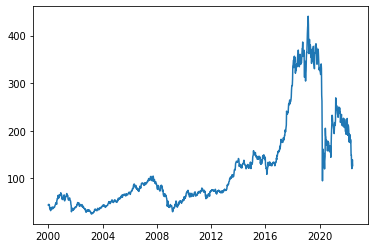

In [8]:
plt.plot(stock_w.Close)

(array([427., 288., 177.,  68.,  56.,  38.,   8.,  67.,  37.,   5.]),
 array([ 25.54999924,  67.05699883, 108.56399841, 150.070998  ,
        191.57799759, 233.08499718, 274.59199677, 316.09899635,
        357.60599594, 399.11299553, 440.61999512]),
 <BarContainer object of 10 artists>)

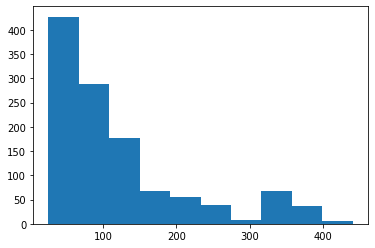

In [9]:
plt.hist(stock_w.Close)